In [ ]:

!pip install -U imbalanced-learn

# **Import the neccessary libraries**

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, KFold ,cross_val_score


from imblearn.over_sampling import SMOTE


# **Using Google colab to upload dataset**

In [ ]:
'''
#Using Google colab to upload dataset
uploaded = files.upload()
'''

'\n#Using Google colab to upload dataset\nuploaded = files.upload()\n'

# **Using Google drive to upload dataset**

In [ ]:

#Using Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the dataset**

In [ ]:
# Step 2: Define the file path
file_path = '/content/drive/My Drive/MitM_multiclass.csv'

# Step 3: Load the dataset
import pandas as pd
df = pd.read_csv(file_path)

# Step 4: Display the first few rows of the dataframe
df

,timestamp,datapath_id,in_port,outport,src_mac,dst_mac,src_ip,dst_ip,time_to_live,protocol,tp_src,tp_dst,icmpv4_code,icmpv4_type,packet_size_bytes,label
0,"05/31/2024, 01:59:08",1,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,1,0.0,0.0,0,8,98,0
1,"05/31/2024, 01:59:08",1,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,6,58406.0,5050.0,-1,-1,74,0
2,"05/31/2024, 01:59:08",5,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,1,0.0,0.0,0,8,98,0
3,"05/31/2024, 01:59:08",5,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,6,58406.0,5050.0,-1,-1,74,0
4,"05/31/2024, 01:59:08",1,2,4294967291,00:00:00:00:00:02,00:00:00:00:00:01,10.0.0.2,10.0.0.1,64,1,0.0,0.0,0,0,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122515,"06/01/2024, 20:35:28",7,1,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122516,"06/01/2024, 20:35:28",1,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122517,"06/01/2024, 20:35:28",6,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122518,"06/01/2024, 20:35:28",3,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2


In [ ]:
df.head()

,timestamp,datapath_id,in_port,outport,src_mac,dst_mac,src_ip,dst_ip,time_to_live,protocol,tp_src,tp_dst,icmpv4_code,icmpv4_type,packet_size_bytes,label
0,"05/31/2024, 01:59:08",1,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,1,0.0,0.0,0,8,98,0
1,"05/31/2024, 01:59:08",1,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,6,58406.0,5050.0,-1,-1,74,0
2,"05/31/2024, 01:59:08",5,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,1,0.0,0.0,0,8,98,0
3,"05/31/2024, 01:59:08",5,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,6,58406.0,5050.0,-1,-1,74,0
4,"05/31/2024, 01:59:08",1,2,4294967291,00:00:00:00:00:02,00:00:00:00:00:01,10.0.0.2,10.0.0.1,64,1,0.0,0.0,0,0,98,0


# **# Data preprocessing**

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
df

,timestamp,datapath_id,in_port,outport,src_mac,dst_mac,src_ip,dst_ip,time_to_live,protocol,tp_src,tp_dst,icmpv4_code,icmpv4_type,packet_size_bytes,label
0,"05/31/2024, 01:59:08",1,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,1,0.0,0.0,0,8,98,0
1,"05/31/2024, 01:59:08",1,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,6,58406.0,5050.0,-1,-1,74,0
2,"05/31/2024, 01:59:08",5,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,1,0.0,0.0,0,8,98,0
3,"05/31/2024, 01:59:08",5,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,6,58406.0,5050.0,-1,-1,74,0
4,"05/31/2024, 01:59:08",1,2,4294967291,00:00:00:00:00:02,00:00:00:00:00:01,10.0.0.2,10.0.0.1,64,1,0.0,0.0,0,0,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122515,"06/01/2024, 20:35:28",7,1,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122516,"06/01/2024, 20:35:28",1,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122517,"06/01/2024, 20:35:28",6,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122518,"06/01/2024, 20:35:28",3,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2


In [ ]:
# Display summary of missing values (if there is not missing values do not execute the below code )
print("Missing data summary:")
print(df.isnull().sum())



Missing data summary:
timestamp                 0
datapath_id               0
in_port                   0
outport                   0
src_mac                   0
dst_mac                   0
src_ip                    0
dst_ip                    0
time_to_live              0
protocol                  0
tp_src               463896
tp_dst               463896
icmpv4_code               0
icmpv4_type               0
packet_size_bytes         0
label                     0
dtype: int64


In [ ]:

# Fill missing values with 0
df = df.fillna(0)

# Fill missing values with the mean of the column
#df = df.fillna(df.mean())

# Forward fill
#df = df.fillna(method='ffill')

# Backward fill
#df = df.fillna(method='bfill')

# Interpolate missing values
#df = df.interpolate()
df


,timestamp,datapath_id,in_port,outport,src_mac,dst_mac,src_ip,dst_ip,time_to_live,protocol,tp_src,tp_dst,icmpv4_code,icmpv4_type,packet_size_bytes,label
0,"05/31/2024, 01:59:08",1,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,1,0.0,0.0,0,8,98,0
1,"05/31/2024, 01:59:08",1,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,6,58406.0,5050.0,-1,-1,74,0
2,"05/31/2024, 01:59:08",5,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,1,0.0,0.0,0,8,98,0
3,"05/31/2024, 01:59:08",5,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,6,58406.0,5050.0,-1,-1,74,0
4,"05/31/2024, 01:59:08",1,2,4294967291,00:00:00:00:00:02,00:00:00:00:00:01,10.0.0.2,10.0.0.1,64,1,0.0,0.0,0,0,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122515,"06/01/2024, 20:35:28",7,1,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122516,"06/01/2024, 20:35:28",1,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122517,"06/01/2024, 20:35:28",6,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122518,"06/01/2024, 20:35:28",3,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2


In [ ]:
#verify that all missing values are  filled
print(df.isnull().sum())

timestamp            0
datapath_id          0
in_port              0
outport              0
src_mac              0
dst_mac              0
src_ip               0
dst_ip               0
time_to_live         0
protocol             0
tp_src               0
tp_dst               0
icmpv4_code          0
icmpv4_type          0
packet_size_bytes    0
label                0
dtype: int64


In [ ]:
df

,timestamp,datapath_id,in_port,outport,src_mac,dst_mac,src_ip,dst_ip,time_to_live,protocol,tp_src,tp_dst,icmpv4_code,icmpv4_type,packet_size_bytes,label
0,"05/31/2024, 01:59:08",1,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,1,0.0,0.0,0,8,98,0
1,"05/31/2024, 01:59:08",1,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,6,58406.0,5050.0,-1,-1,74,0
2,"05/31/2024, 01:59:08",5,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,1,0.0,0.0,0,8,98,0
3,"05/31/2024, 01:59:08",5,1,4294967291,00:00:00:00:00:01,00:00:00:00:00:02,10.0.0.1,10.0.0.2,64,6,58406.0,5050.0,-1,-1,74,0
4,"05/31/2024, 01:59:08",1,2,4294967291,00:00:00:00:00:02,00:00:00:00:00:01,10.0.0.2,10.0.0.1,64,1,0.0,0.0,0,0,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122515,"06/01/2024, 20:35:28",7,1,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122516,"06/01/2024, 20:35:28",1,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122517,"06/01/2024, 20:35:28",6,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2
1122518,"06/01/2024, 20:35:28",3,3,4294967291,00:00:00:00:00:04,00:00:00:00:00:03,10.0.0.8,10.0.0.3,64,6,1883.0,46156.0,-1,-1,66,2


# **# Apply Labelencoder to categorical columns**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder instance
le = LabelEncoder()

# Iterate over each column in the dataframe
for column in df.columns:
    # Check if the column's data type is 'object' (categorical)
    if df[column].dtype == 'object':
        # Print the column name that is being encoded
        print(f'Encoding {column}...')
        # Apply the LabelEncoder to the column
        df[column] = le.fit_transform(df[column])

# Display the first few rows of the dataframe after encoding
print("First few rows after encoding categorical variables:")
print(df.head())


Encoding timestamp...
Encoding src_mac...
Encoding dst_mac...
Encoding src_ip...
Encoding dst_ip...
First few rows after encoding categorical variables:
   timestamp  datapath_id  in_port     outport  src_mac  dst_mac  src_ip  \
0       2086            1        1  4294967291        0        1       0   
1       2086            1        1  4294967291        0        1       0   
2       2086            5        1  4294967291        0        1       0   
3       2086            5        1  4294967291        0        1       0   
4       2086            1        2  4294967291        1        0       1   

   dst_ip  time_to_live  protocol   tp_src  tp_dst  icmpv4_code  icmpv4_type  \
0     893            64         1      0.0     0.0            0            8   
1     893            64         6  58406.0  5050.0           -1           -1   
2     893            64         1      0.0     0.0            0            8   
3     893            64         6  58406.0  5050.0           -1       

In [ ]:
df

,timestamp,datapath_id,in_port,outport,src_mac,dst_mac,src_ip,dst_ip,time_to_live,protocol,tp_src,tp_dst,icmpv4_code,icmpv4_type,packet_size_bytes,label
0,2086,1,1,4294967291,0,1,0,893,64,1,0.0,0.0,0,8,98,0
1,2086,1,1,4294967291,0,1,0,893,64,6,58406.0,5050.0,-1,-1,74,0
2,2086,5,1,4294967291,0,1,0,893,64,1,0.0,0.0,0,8,98,0
3,2086,5,1,4294967291,0,1,0,893,64,6,58406.0,5050.0,-1,-1,74,0
4,2086,1,2,4294967291,1,0,1,892,64,1,0.0,0.0,0,0,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122515,3138,7,1,4294967291,3,2,7,894,64,6,1883.0,46156.0,-1,-1,66,2
1122516,3138,1,3,4294967291,3,2,7,894,64,6,1883.0,46156.0,-1,-1,66,2
1122517,3138,6,3,4294967291,3,2,7,894,64,6,1883.0,46156.0,-1,-1,66,2
1122518,3138,3,3,4294967291,3,2,7,894,64,6,1883.0,46156.0,-1,-1,66,2


# **# Plot    label  data**

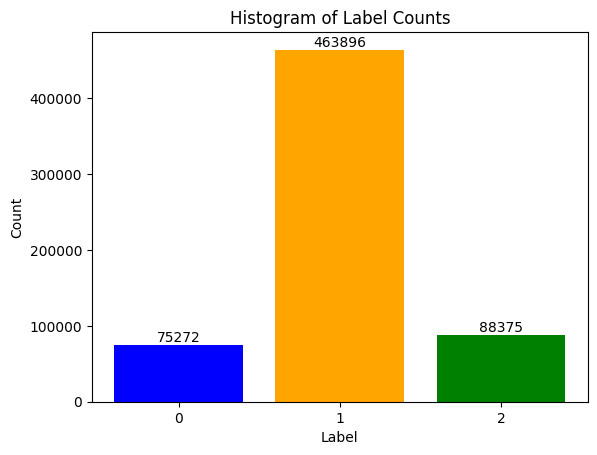

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the occurrences of each class in the 'label' column
label_counts = df['label'].value_counts().sort_index()

# Plot the histogram
plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange', 'green'])

# Annotate the bars with count values
for i, count in enumerate(label_counts.values):
    plt.text(label_counts.index[i], count, str(count), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Label Counts')
plt.xticks(label_counts.index)
plt.show()


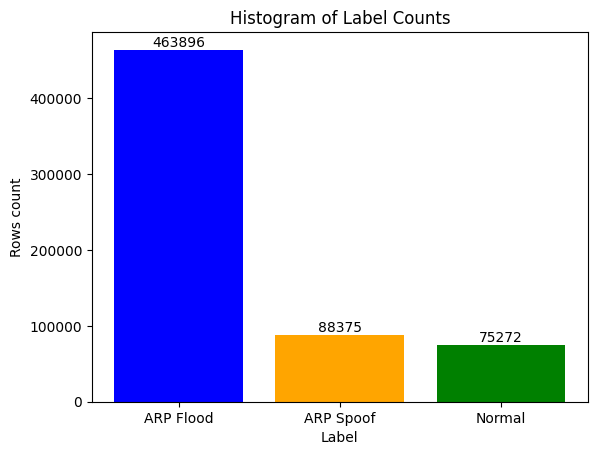

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Mapping class indices to class names
class_names = {
    0: 'Normal',
    1: 'ARP Flood',
    2: 'ARP Spoof'
}

# Replace numerical labels with class names
l = df['label'].map(class_names)

# Count the occurrences of each class in the 'label' column
label_counts = l.value_counts().sort_index()

# Plot the histogram
plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange', 'green'])

# Annotate the bars with count values
for i, count in enumerate(label_counts.values):
    plt.text(label_counts.index[i], count, str(count), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Rows count')
plt.title('Histogram of Label Counts')
plt.xticks(label_counts.index)
plt.show()


# **# Split data into features (X) and target (y)**

In [ ]:
# Split data into features (X) and target (y)
X = df.drop('label', axis=1)  # Replace 'target' with the actual target column name
y = df['label']

  # **# Apply StandardScaler**

In [ ]:
# Apply StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.32206092, -1.22043484, -1.43850985, ...,  2.25231159,
         4.40165292,  0.2058837 ],
       [ 0.32206092, -1.22043484, -1.43850985, ..., -0.28820203,
        -0.25591227,  0.00810669],
       [ 0.32206092,  1.36110362, -1.43850985, ...,  2.25231159,
         4.40165292,  0.2058837 ],
       ...,
       [ 2.52995276,  2.00648824,  1.54185862, ..., -0.28820203,
        -0.25591227, -0.05781899],
       [ 2.52995276,  0.07033439,  1.54185862, ..., -0.28820203,
        -0.25591227, -0.05781899],
       [ 2.52995276,  0.71571901,  1.54185862, ..., -0.28820203,
        -0.25591227, -0.05781899]])

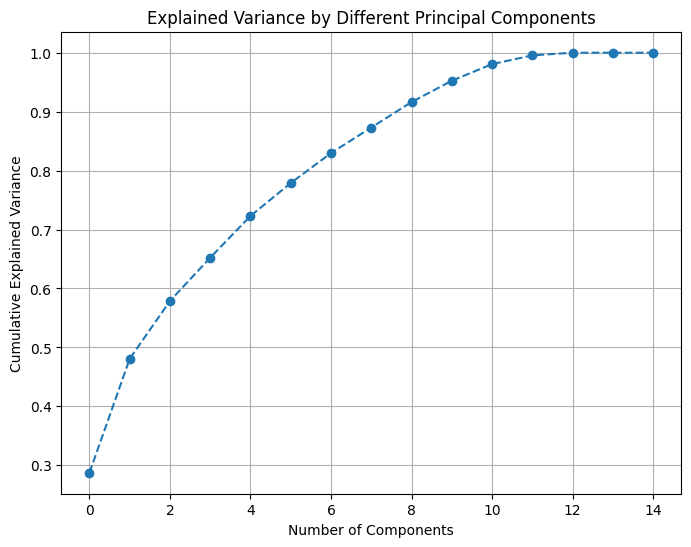

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Step 3: Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X)

# Step 4: Decide the number of components
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance to decide the number of components
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid()
plt.show()

# **Using PCA to features reduction**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Create PCA object
pca = PCA(n_components=8)  # Retain 8 compenents

# Fit PCA to the data
pca.fit(X)

# Transform the data into the new feature space
X = pca.transform(X)

X


array([[ 3.32207177, -3.659189  , -0.13373544, ...,  2.52238698,
         2.17098987, -0.0552624 ],
       [ 0.82517259,  1.8794428 ,  1.34496379, ...,  2.42214505,
         0.45327344, -0.01861929],
       [ 3.95692832, -3.40564196, -0.16777107, ...,  0.58037673,
         2.09550234, -0.03715901],
       ...,
       [ 3.32195953,  1.33549876, -1.01280375, ..., -1.5237588 ,
        -2.0382605 ,  0.05223106],
       [ 2.84581711,  1.14533848, -0.98727703, ..., -0.06725111,
        -1.98164485,  0.03865351],
       [ 3.00453125,  1.20872524, -0.99578593, ..., -0.55275367,
        -2.00051673,  0.04317936]])

In [ ]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1122515    2
1122516    2
1122517    2
1122518    2
1122519    2
Name: label, Length: 627543, dtype: int64

In [ ]:
# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Transformed data (with reduced dimensionality)
print("Transformed data shape:", X.shape)

Explained variance ratio: [0.2873889  0.19331374 0.09811384 0.073475   0.07081462 0.05575573
 0.05083778 0.04340741]
Transformed data shape: (627543, 8)


In [ ]:
# Create a DataFrame with the transformed data and add feature names
feature_names = [f'PC{i+1}' for i in range(X.shape[1])]
X_transformed_df = pd.DataFrame(X, columns=feature_names)

# Print the first few rows of the transformed data with feature names
print(X_transformed_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.322072 -3.659189 -0.133735  0.758484 -0.644887  2.522387  2.170990   
1  0.825173  1.879443  1.344964  0.925807 -2.064109  2.422145  0.453273   
2  3.956928 -3.405642 -0.167771  2.272655 -0.416500  0.580377  2.095502   
3  1.460029  2.132990  1.310928  2.439977 -1.835723  0.480135  0.377786   
4  2.483552 -2.011006 -0.284450 -0.598261 -0.557147  1.620648  0.759372   

        PC8  
0 -0.055262  
1 -0.018619  
2 -0.037159  
3 -0.000516  
4 -0.016074  


In [ ]:
X.shape

(627543, 8)

In [ ]:
y.shape

(627543,)

# **Split data into training and testing sets**

In [ ]:
'''# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

In [ ]:
# Split data into 60% training, 20% validation, and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

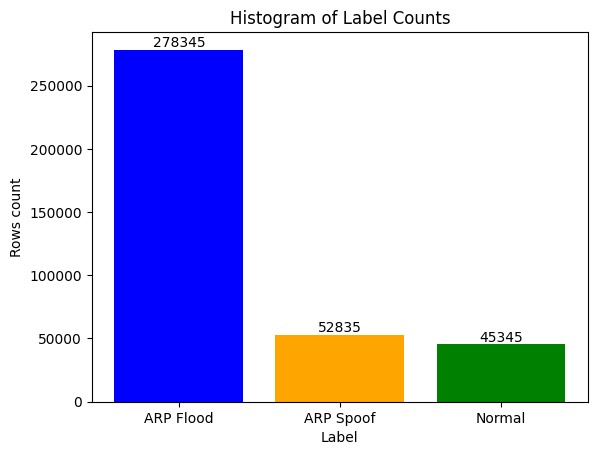

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Mapping class indices to class names
class_names = {
    0: 'Normal',
    1: 'ARP Flood',
    2: 'ARP Spoof'
}
y_train1 = pd.DataFrame({'label': y_train})

# Replace numerical labels with class names
l1 = y_train1['label'].map(class_names)

# Count the occurrences of each class in the 'label' column
label_counts = l1.value_counts().sort_index()

# Plot the histogram
plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange', 'green'])

# Annotate the bars with count values
for i, count in enumerate(label_counts.values):
    plt.text(label_counts.index[i], count, str(count), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Rows count')
plt.title('Histogram of Label Counts')
plt.xticks(label_counts.index)
plt.show()


In [ ]:
y_train

1034201    2
971719     1
941856     1
798165     1
975285     1
          ..
604551     1
753461     1
860121     1
626215     1
616241     1
Name: label, Length: 376525, dtype: int64

# **# Apply SMOTE to the training data in order to balnced data**

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



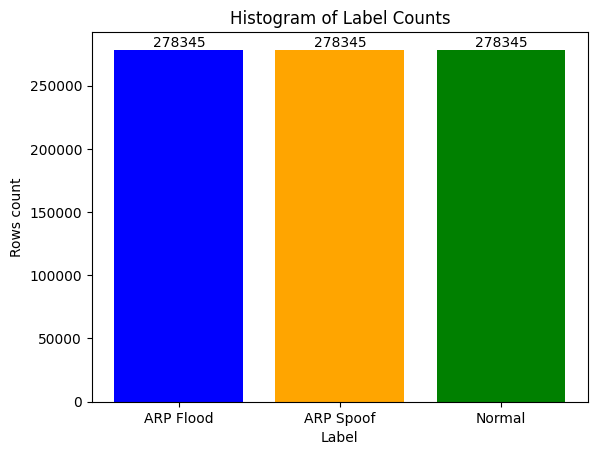

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt



# Mapping class indices to class names
class_names = {
    0: 'Normal',
    1: 'ARP Flood',
    2: 'ARP Spoof'
}
y_train_resampled1  = pd.DataFrame({'label': y_train_resampled })

# Replace numerical labels with class names
l1 = y_train_resampled1 ['label'].map(class_names)

# Count the occurrences of each class in the 'label' column
label_counts = l1.value_counts().sort_index()

# Plot the histogram
plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange', 'green'])

# Annotate the bars with count values
for i, count in enumerate(label_counts.values):
    plt.text(label_counts.index[i], count, str(count), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Rows count')
plt.title('Histogram of Label Counts')
plt.xticks(label_counts.index)
plt.show()



In [ ]:
# Display the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
print(pd.Series(y_train_resampled).value_counts())



Class distribution after applying SMOTE:
label
2    278345
1    278345
0    278345
Name: count, dtype: int64


# **APPLY DEEP LEARNING CNN**

Just for test below code

# **CNN final test **

Epoch 1/50
13048/13048 [==============================] - 59s 4ms/step - loss: 0.0507 - accuracy: 0.9881 - val_loss: 0.0177 - val_accuracy: 0.9981 - lr: 0.0010
Epoch 2/50
13048/13048 [==============================] - 45s 3ms/step - loss: 0.0293 - accuracy: 0.9939 - val_loss: 0.0168 - val_accuracy: 0.9977 - lr: 0.0010
Epoch 3/50
13048/13048 [==============================] - 48s 4ms/step - loss: 0.0258 - accuracy: 0.9947 - val_loss: 0.0124 - val_accuracy: 0.9988 - lr: 0.0010
Epoch 4/50
13048/13048 [==============================] - 49s 4ms/step - loss: 0.0235 - accuracy: 0.9951 - val_loss: 0.0117 - val_accuracy: 0.9986 - lr: 0.0010
Epoch 5/50
13048/13048 [==============================] - 46s 4ms/step - loss: 0.0227 - accuracy: 0.9952 - val_loss: 0.0117 - val_accuracy: 0.9987 - lr: 0.0010
Epoch 6/50
13048/13048 [==============================] - 46s 4ms/step - loss: 0.0215 - accuracy: 0.9956 - val_loss: 0.0110 - val_accuracy: 0.9990 - lr: 0.0010
Epoch 7/50
13048/13048 [================

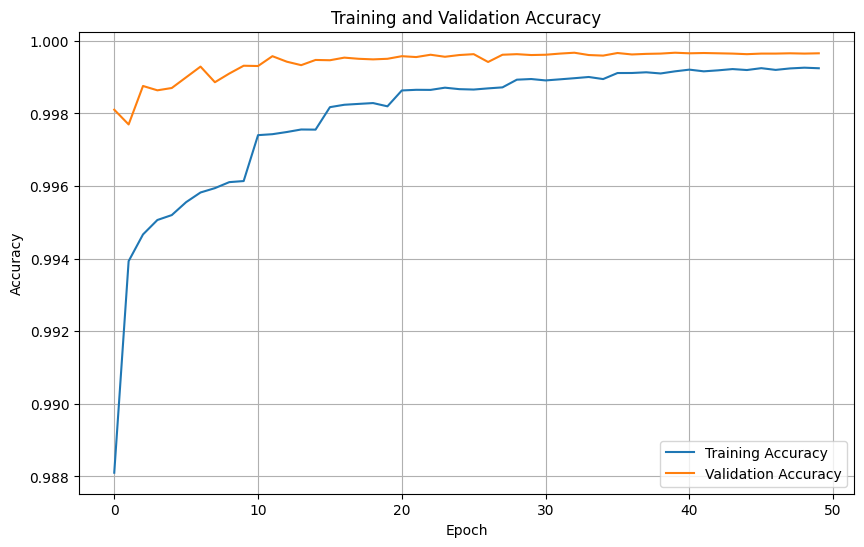

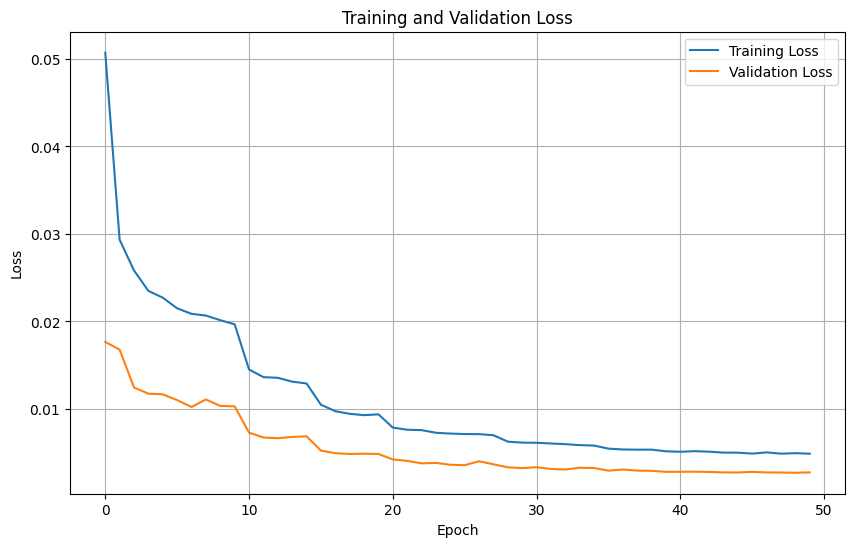

3923/3923 [==============================] - 7s 2ms/step


<Figure size 800x800 with 0 Axes>

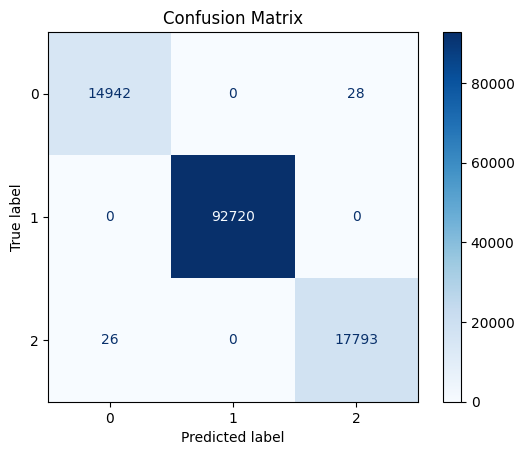

Training Time: 2393.48 seconds
Testing Time: 10.33 seconds
False Alarm Rate (FAR): 0.02%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14970
           1       1.00      1.00      1.00     92720
           2       1.00      1.00      1.00     17819

    accuracy                           1.00    125509
   macro avg       1.00      1.00      1.00    125509
weighted avg       1.00      1.00      1.00    125509



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import time

# Assuming your data is loaded and preprocessed up to this point

# Convert target labels to categorical
y_train_resampled_cat = to_categorical(y_train_resampled)
y_validation_cat = to_categorical(y_validation)
y_test_cat = to_categorical(y_test)

# Build the CNN model with increased dropout and L2 regularization
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(len(np.unique(df['label'])), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define Early Stopping and Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Reshape X data for Conv1D input
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_validation = X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with early stopping and learning rate scheduler
start_time = time.time()
history = model.fit(X_train_resampled, y_train_resampled_cat, epochs=50, batch_size=64,
                    validation_data=(X_validation, y_validation_cat), callbacks=[early_stopping, reduce_lr])
training_time = time.time() - start_time

# Evaluate the model
start_time = time.time()
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
testing_time = time.time() - start_time
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate predictions and confusion matrix
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_.astype(str)).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Calculate False Alarm Rate (FAR)
FP = cm.sum(axis=0) - np.diag(cm)
TN = cm.sum() - (FP + cm.sum(axis=1) - np.diag(cm) + np.diag(cm))
FAR = FP / (FP + TN)
false_alarm_rate = np.mean(FAR)

# Print results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")
print(f"False Alarm Rate (FAR): {false_alarm_rate:.2%}")

# Decode the labels
label_encoder = LabelEncoder()
label_encoder.fit(df['label'])
y_test_decoded = label_encoder.inverse_transform(np.argmax(y_test_cat, axis=1))
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Classification report for precision, recall, and F1-score
report = classification_report(y_test_decoded, y_pred_decoded, target_names=label_encoder.classes_.astype(str))
print("Classification Report:")
print(report)
